In [121]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
import pandas as pd
import numpy as np

In [123]:
from pandarallel import pandarallel
import multiprocessing

num_processors = multiprocessing.cpu_count()
print(f'Available CPUs: {num_processors}')

pandarallel.initialize(nb_workers=num_processors-1, use_memory_fs=False)

Available CPUs: 4
INFO: Pandarallel will run on 3 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [124]:
from helpers.gcs_funcs import list_blobs, list_blobs_pd

In [125]:
BUCKET_NAME = "kisai-data-msca310019-capstone"
FULL_BUCKET_NAME = "gs://" + BUCKET_NAME 
FOLDER_NAME = "CEFR"

In [126]:
files_df = list_blobs_pd(bucket_name=BUCKET_NAME, 
           folder_name=FOLDER_NAME)
file_names = list(files_df.iloc[1:]["Name"])

In [127]:
file_names

['CEFR/CEFR_kaggle.csv',
 'CEFR/NewsInLevels_dataset.csv',
 'CEFR/OneStopEnglishCorpus_Dataset.csv',
 'CEFR/book_levels.csv',
 'CEFR/models/',
 'CEFR/models/tf_model.h5',
 'CEFR/models/tf_model.preproc']

In [128]:
df1 = pd.read_csv(FULL_BUCKET_NAME + "/CEFR/CEFR_kaggle.csv")
df2 = pd.read_csv(FULL_BUCKET_NAME + "/CEFR/NewsInLevels_dataset.csv")
df3 = pd.read_csv(FULL_BUCKET_NAME + "/CEFR/OneStopEnglishCorpus_Dataset.csv")

### CEFR Kaggle Dataset

In [129]:
df1.head()

,text,label
0,Hi!\nI've been meaning to write for ages and f...,B2
1,﻿It was not so much how hard people found the ...,B2
2,Keith recently came back from a trip to Chicag...,B2
3,"The Griffith Observatory is a planetarium, and...",B2
4,-LRB- The Hollywood Reporter -RRB- It's offici...,B2


In [130]:
df1.label.value_counts()

A1    288
B2    286
A2    272
C1    241
B1    205
C2    202
Name: label, dtype: int64

In [131]:
df1.shape

(1494, 2)

#### Elementary

In [132]:
print(df1[df1.label=="A1"].iloc[0]["text"])

You need to try harder in school!
I am doing well in school.
Then why are your marks in science so low?
I don't understand science, that's all.
Is that the same reasoning you have for math?
Yes, and English, too.
Tell me one single subject you're doing well in.
Well, I'm doing wonderfully in my music class.
What about history?
Only the parts about Woodstock.
That's it! You're grounded! No guitar for a month.
Great, now I'll surely have a low GPA.


#### Intermediate

In [133]:
print(df1[df1.label=="B1"].iloc[1]["text"])

David and Melissa had been a happily married couple for six years. They lived a comfortably modest life in a small apartment and had been saving up for years in preparation for the next giant step in their life: a baby. However, after repeatedly trying to get pregnant for a whole year, they consulted a doctor and received devastating news. Melissa would be unable to conceive a child for the rest of her life.
The bad news struck Melissa terribly hard. Seeing his wife in such a distraught and depressed state broke David's heart. "Don't worry," he told her. "I'm going to make you the happiest woman in the planet, even if it's just the two of us." He then went to the bank, took out all their savings that had been held for the baby, and set out to do whatever he could to cheer his wife up.
Since they no longer had to be careful with how much money they spent, David began splurging on everything he could think of. First, he took Melissa shopping for the finest and most beautiful clothes she 

#### Advanced

In [134]:
print(df1[df1.label=="C1"].iloc[0]["text"])

Police and neighbors were searching for three young Michigan boys Saturday who have been missing since their father claimed he dropped them off with a woman before trying to kill himself a day earlier.
The father survived his suicide attempt and is being cared for in a mental health facility, said Morenci, Michigan, Police Chief Larry Weeks on Saturday.
But Michigan authorities do not know what has happened to his boys -- 5-year-old Tanner Skelton, 7-year-old Alexander William Skelton and 9-year-old Andrew Skelton -- prompting them to issue an Amber Alert on Friday.
Weeks said that the boysfather, John Skelton, told police that he dropped the boys off Friday morning with a woman he identified as Joann Taylor -- in part to ensure they did n't see him while and after he tried to commit suicide.
John Skelton told police that the woman, whom he allegedly met on the internet, was supposed to drop the boys off at their home in Morenci, a southern Michigan town of about 2,400 people about 40 

In [135]:
# Mapping dictionary
mapping = {'A': 1, 'B': 2, 'C': 3}

# Update the DataFrame column
df1['label'] = df1['label'].str[0].map(mapping)

print(df1)

                                                   text  label
0     Hi!\nI've been meaning to write for ages and f...      2
1     ﻿It was not so much how hard people found the ...      2
2     Keith recently came back from a trip to Chicag...      2
3     The Griffith Observatory is a planetarium, and...      2
4     -LRB- The Hollywood Reporter -RRB- It's offici...      2
...                                                 ...    ...
1489  Light propagating in the vicinity of astrophys...      3
1490  Future of dentistry has become one of the most...      3
1491  ﻿The forests – and suburbs – of Europe are ech...      3
1492  Hedge funds are turning bullish on oil once ag...      3
1493  Without additional heating, radiative cooling ...      3

[1494 rows x 2 columns]


In [136]:
df1.label.value_counts()

1    560
2    491
3    443
Name: label, dtype: int64

In [137]:
df1["source"] = "cefr_kaggle"
df1 = df1[["text", "source", "label"]]

### NewsInLevels Dataset

In [138]:
df2.head()

,level_url,level,text
0,https:www.newsinlevels.comproductsscientists-i...,1,Scientists at a research station in Norway are...
1,https:www.newsinlevels.comproductsscientists-i...,2,Scientists who are researching the Arctic regi...
2,https:www.newsinlevels.comproductsscientists-i...,3,Scientists studying the Arctic region from the...
3,https:www.newsinlevels.comproductseasy-speakin...,1,"Hello students, There is a website for you. It..."
4,https:www.newsinlevels.comproductseasy-speakin...,2,"Hello students,\nWe have a website for you. It..."


In [139]:
df2.level.value_counts()

1    3700
3    3699
2    3698
Name: level, dtype: int64

In [140]:
df2.shape

(11097, 3)

#### Elementary

In [141]:
print(df2.iloc[0]["text"])

Scientists at a research station in Norway are having problems researching the Arctic region. They need to work fast because the area is changing. The changes are faster than anywhere else in the world.
The Arctic is warming four times faster than other places. On the Svalbard islands, temperatures are climbing up to seven times quicker than in the rest of the world. Sea ice is melting. Arctic animals like polar bears are changing their behavior. They find new areas for hunting. Buildings are getting damaged because of melting ice and ground. It is also getting more challenging to reach research sites.
The scientists are working fast. They want to understand how these changes will impact the planet’s future.



#### Intermediate

In [142]:
print(df2.iloc[1]["text"])

Scientists who are researching the Arctic region from the Ny-Aalesund research station in Norway are having problems.
They need to work fast because the area is changing faster than anywhere else in the world. The Arctic is heating up four times faster than the rest of the world, and on the Svalbard archipelago, temperatures are rising up to seven times the global average. Higher temperatures cause sea ice to melt and Arctic animals, such as polar bears, change their behavior. Melting ice and permafrost cause damage to buildings in the region, and research sites are becoming more difficult to reach.
Scientists are hurrying to understand the impact of the changes in the region on the future of the planet.



#### Advanced

In [143]:
print(df2.iloc[2]["text"])

Scientists studying the Arctic region from the research station in Ny-Aalesund, Norway, are facing difficulties accessing and collecting data as the area is changing faster than anywhere else in the world.
The Arctic is warming four times faster than the rest of the world, with the Svalbard archipelago experiencing temperatures that are climbing up to seven times the global average. The warmer temperatures and loss of sea ice have led to changes in the behavior of Arctic animals, such as polar bears, who have lost their hunting grounds due. Melting glaciers and permafrost have caused damage to buildings in the region, including the town store that’s being repaired this year, and research sites have become harder to reach.
Despite the challenges, scientists are rushing to understand the implications of the changes in the region for the planet’s future.



In [144]:
df2.rename(columns={"level": "label"}, inplace=True)

In [145]:
df2["source"] = "news_in_levels"
df2 = df2[["text", "source", "label"]]

In [146]:
df2.head()

,text,source,label
0,Scientists at a research station in Norway are...,news_in_levels,1
1,Scientists who are researching the Arctic regi...,news_in_levels,2
2,Scientists studying the Arctic region from the...,news_in_levels,3
3,"Hello students, There is a website for you. It...",news_in_levels,1
4,"Hello students,\nWe have a website for you. It...",news_in_levels,2


### OneStopEnglishCorpus Dataset

In [147]:
df3.head()

,url,text,level
0,/nishkalavallabhi/OneStopEnglishCorpus/blob/ma...,"﻿When you see the word Amazon, what’s the firs...",Elementary
1,/nishkalavallabhi/OneStopEnglishCorpus/blob/ma...,"﻿To tourists, Amsterdam still seems very liber...",Elementary
2,/nishkalavallabhi/OneStopEnglishCorpus/blob/ma...,"﻿Anitta, a music star from Brazil, has million...",Elementary
3,/nishkalavallabhi/OneStopEnglishCorpus/blob/ma...,Google has made maps of the world’s highest mo...,Elementary
4,/nishkalavallabhi/OneStopEnglishCorpus/blob/ma...,﻿The auction of a Banksy painting that disappe...,Elementary


In [148]:
df3.level.value_counts()

Elementary      189
Intermediate    189
Advanced        189
Name: level, dtype: int64

In [149]:
df3.shape

(567, 3)

#### Elementary

In [150]:
print(df3.iloc[0]["text"])

﻿When you see the word Amazon, what’s the first thing you think of – the world’s biggest forest, the longest river or the largest internet shop – and which do you think is most important? 
These are the questions in a debate about the internet. Brazil and Peru have made objections to a bid made by the US online shop for the domain name, “.amazon”. 
Amazon has asked for its company name to be a top-level domain name (currently “.com”), but the South American governments say this would stop the use of this internet address for environmental protection, indigenous rights and other public interest uses. 
There are many other disputed claims to names, including “.patagonia”. 
Until now, the differences between commercial, governmental and other types of identity were easy to see in every internet address by the use of “.com”, “.gov” and 20 other categories. 
But soon there are going to be more of these categories – or generic top-level domains (gTLDs) as they are technically known. 
The Int

#### Intermediate

In [151]:
print(df3[df3.level=="Intermediate"].iloc[0]["text"])

When you see the word Amazon, whats the first thing you think of  the worlds biggest forest, the longest river or the largest internet shop  and which do you think is most important?These are questions in a debate about how to redraw the boundaries of the internet. Brazil and Peru have made objections to a bid made by the huge US e-commerce company for a prime new piece of cyberspace: .amazon.The Seattle-based company has applied for its brand to be a top-level domain name (currently .com), but the South American governments argue this would prevent the use of this internet address for environmental protection, the promotion of indigenous rights and other public interest uses.Together with many other disputed claims to names, including .patagonia, the issue goes directly to the heart of debates about the purpose and governance of the internet.Until now, the differences between commercial, governmental and other types of identity were easy to see in every internet address by the use of 

#### Advanced

In [152]:
print(df3[df3.level=="Advanced"].iloc[0]["text"])

﻿When you see the word Amazon, what’s the first thing that springs to mind – the world’s biggest forest, the longest river or the largest internet retailer – and which do you consider most important?  These questions have risen to the fore in an arcane, but hugely important, debate about how to redraw the boundaries of the internet. Brazil and Peru have lodged objections to a bid made by the US e-commerce giant for a prime new piece of cyberspace: “.amazon”.  The Seattle-based company has applied for its brand to be a top-level domain name (currently “.com”), but the South American governments argue this would prevent the use of this internet address for environmental protection, the promotion of indigenous rights and other public interest uses.  Along with dozens of other disputed claims to names, including “.patagonia” and “.shangrila ”, the issue cuts to the heart of debates about the purpose and governance of the internet.  Until now, the differences between commercial, governmenta

In [153]:
df3.rename(columns={"level": "label"}, inplace=True)

In [154]:
df3["source"] = "onestop_english_corpus"
df3 = df3[["text", "source", "label"]]

In [155]:
# Mapping dictionary
mapping = {'Elementary': 1, 'Intermediate': 2, 'Advanced': 3}

# Update the DataFrame column
df3['label'] = df3['label'].map(mapping)

print(df3)

                                                  text  \
0    ﻿When you see the word Amazon, what’s the firs...   
1    ﻿To tourists, Amsterdam still seems very liber...   
2    ﻿Anitta, a music star from Brazil, has million...   
3    Google has made maps of the world’s highest mo...   
4    ﻿The auction of a Banksy painting that disappe...   
..                                                 ...   
562  ﻿In typical bad-boyfriend style, Dan Sullivan ...   
563  ﻿Thousands of people protested on Australia’s ...   
564  ﻿1 Race engineer  A race engineer liaises betw...   
565  ﻿More than one million British workers might b...   
566  ﻿Low-income countries will remain on the front...   

                     source  label  
0    onestop_english_corpus      1  
1    onestop_english_corpus      1  
2    onestop_english_corpus      1  
3    onestop_english_corpus      1  
4    onestop_english_corpus      1  
..                      ...    ...  
562  onestop_english_corpus      3  
563  on

### Combining the data

In [156]:
df = pd.concat([df1, df2, df3])

In [157]:
df

,text,source,label
0,Hi!\nI've been meaning to write for ages and f...,cefr_kaggle,2
1,﻿It was not so much how hard people found the ...,cefr_kaggle,2
2,Keith recently came back from a trip to Chicag...,cefr_kaggle,2
3,"The Griffith Observatory is a planetarium, and...",cefr_kaggle,2
4,-LRB- The Hollywood Reporter -RRB- It's offici...,cefr_kaggle,2
...,...,...,...
562,"﻿In typical bad-boyfriend style, Dan Sullivan ...",onestop_english_corpus,3
563,﻿Thousands of people protested on Australia’s ...,onestop_english_corpus,3
564,﻿1 Race engineer A race engineer liaises betw...,onestop_english_corpus,3
565,﻿More than one million British workers might b...,onestop_english_corpus,3


### Data Exploration on Data

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
df.head()

,text,source,label
0,Hi!\nI've been meaning to write for ages and f...,cefr_kaggle,2
1,﻿It was not so much how hard people found the ...,cefr_kaggle,2
2,Keith recently came back from a trip to Chicag...,cefr_kaggle,2
3,"The Griffith Observatory is a planetarium, and...",cefr_kaggle,2
4,-LRB- The Hollywood Reporter -RRB- It's offici...,cefr_kaggle,2


In [160]:
import nltk
# nltk.download('punkt')
df["sentence_count"] = df["text"].parallel_apply(lambda t: len(nltk.sent_tokenize(t)))
df["word_count"] = df["text"].parallel_apply(lambda t: len(nltk.word_tokenize(t)))

#### Sentence Count Histogram by Sources

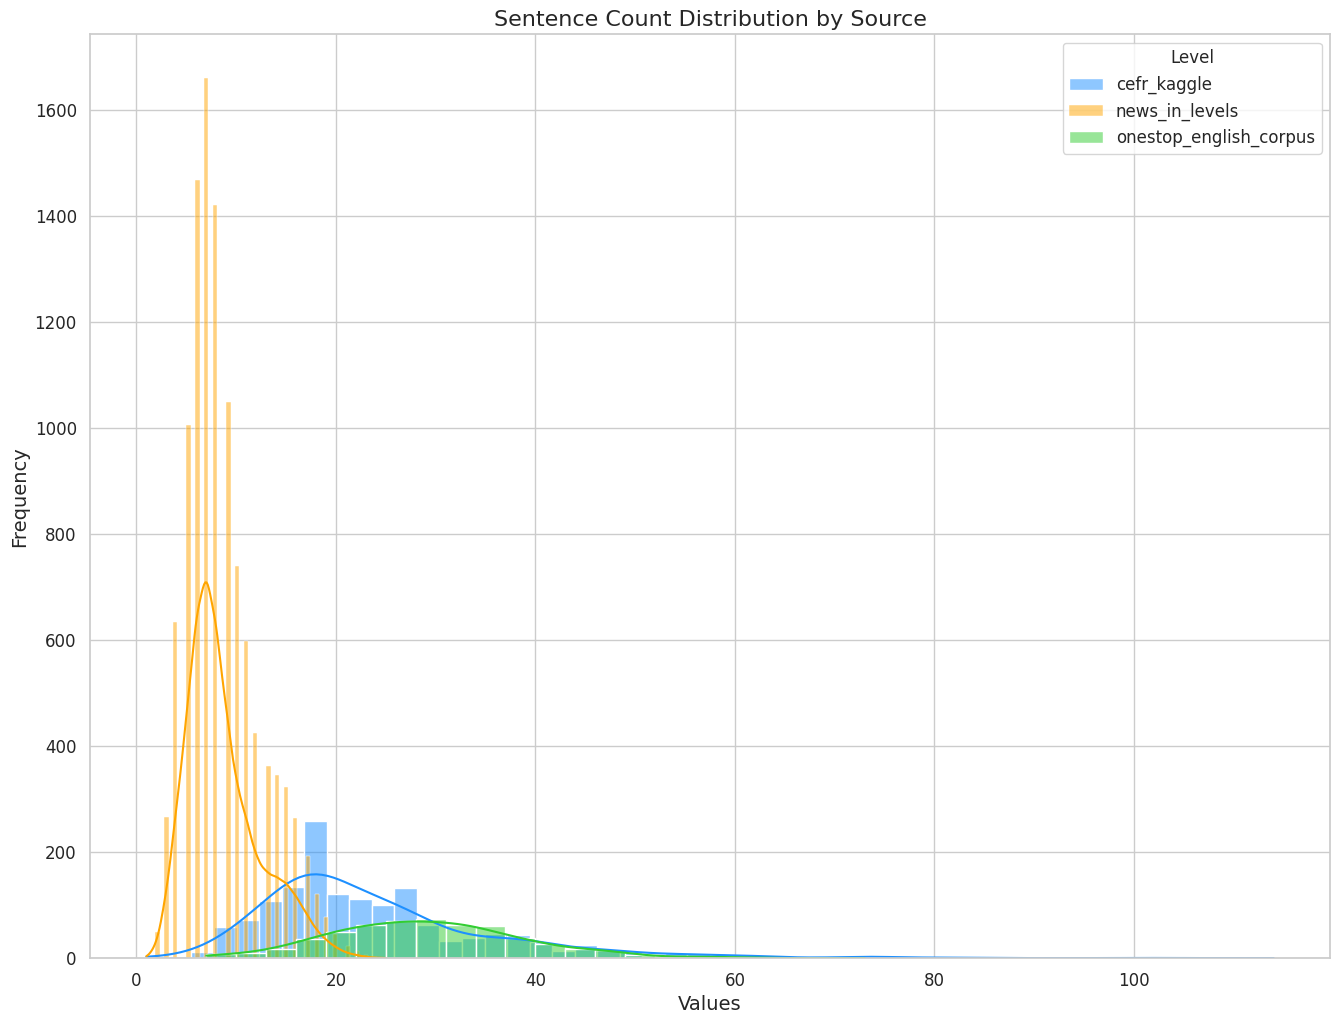

In [161]:
sns.set(style="whitegrid", context="notebook")

# Create the distplot for each level
fig, ax = plt.subplots(figsize=(16, 12))

color_map = {"cefr_kaggle": "dodgerblue", "news_in_levels": "orange", "onestop_english_corpus": "limegreen"}

for source in df["source"].unique():
    sns.histplot(data=df[df["source"] == source], 
                 x="sentence_count", 
                 kde=True, 
                 label=source, 
                 ax=ax, 
                 alpha=.5, 
                 color=color_map[source] )

# Customize the plot
ax.set_title("Sentence Count Distribution by Source", fontsize=16)
ax.set_xlabel("Values", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.legend(title="Level", fontsize=12)
ax.tick_params(axis="both", which="major", labelsize=12)

# Show the plot
plt.show()

#### Sentence Count Histogram by Language Levels

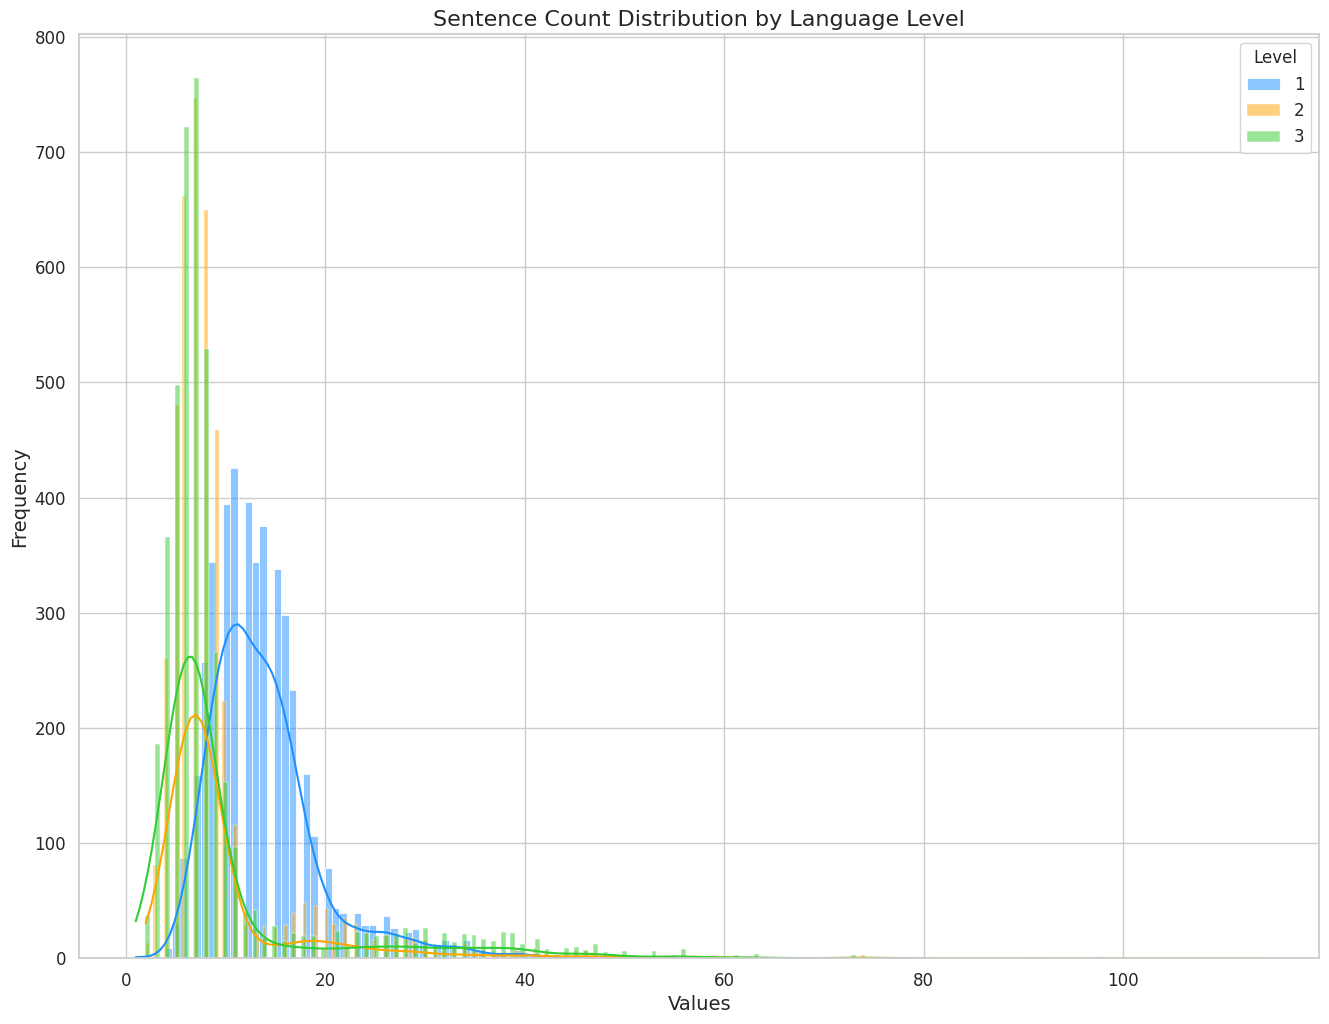

In [162]:
sns.set(style="whitegrid", context="notebook")

# Create the distplot for each level
fig, ax = plt.subplots(figsize=(16, 12))

color_map = {1: "dodgerblue", 2: "orange", 3: "limegreen"}

for level in [1,2,3]:
    sns.histplot(data=df[df["label"] == level], 
                 x="sentence_count", 
                 kde=True, 
                 label=level, 
                 ax=ax, 
                 alpha=.5, 
                 color=color_map[level] )

# Customize the plot
ax.set_title("Sentence Count Distribution by Language Level", fontsize=16)
ax.set_xlabel("Values", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.legend(title="Level", fontsize=12)
ax.tick_params(axis="both", which="major", labelsize=12)

# Show the plot
plt.show()

#### Word Count Histogram by Sources

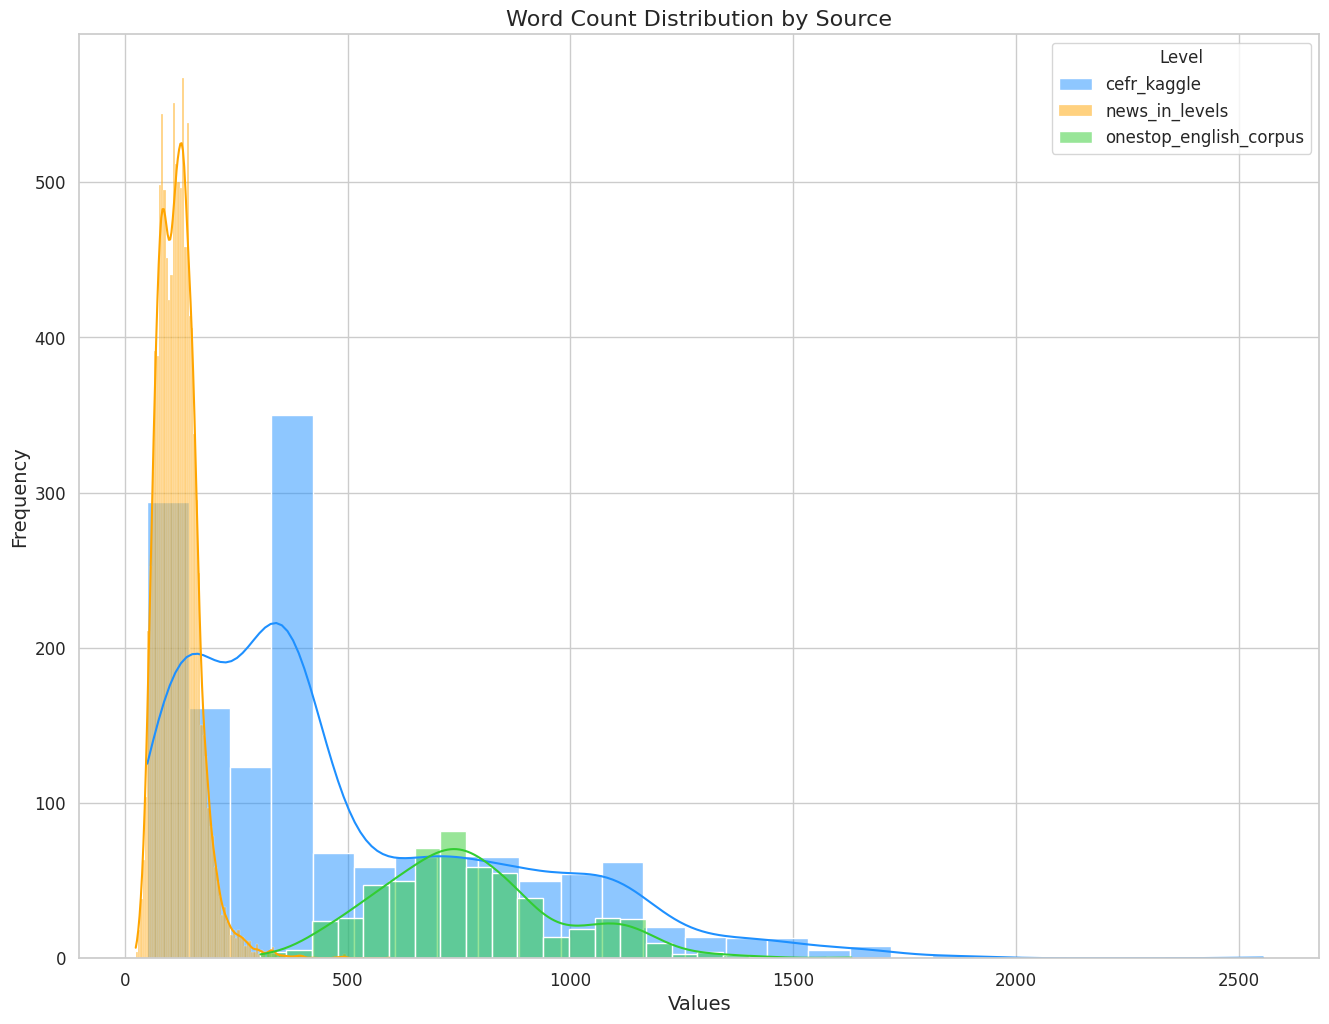

In [163]:
sns.set(style="whitegrid", context="notebook")

# Create the distplot for each level
fig, ax = plt.subplots(figsize=(16, 12))

color_map = {"cefr_kaggle": "dodgerblue", "news_in_levels": "orange", "onestop_english_corpus": "limegreen"}

for source in df["source"].unique():
    sns.histplot(data=df[df["source"] == source], 
                 x="word_count", 
                 kde=True, 
                 label=source, 
                 ax=ax, 
                 alpha=.5, 
                 color=color_map[source] )

# Customize the plot
ax.set_title("Word Count Distribution by Source", fontsize=16)
ax.set_xlabel("Values", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.legend(title="Level", fontsize=12)
ax.tick_params(axis="both", which="major", labelsize=12)

# Show the plot
plt.show()

#### Word Count Histogram by Language Levels

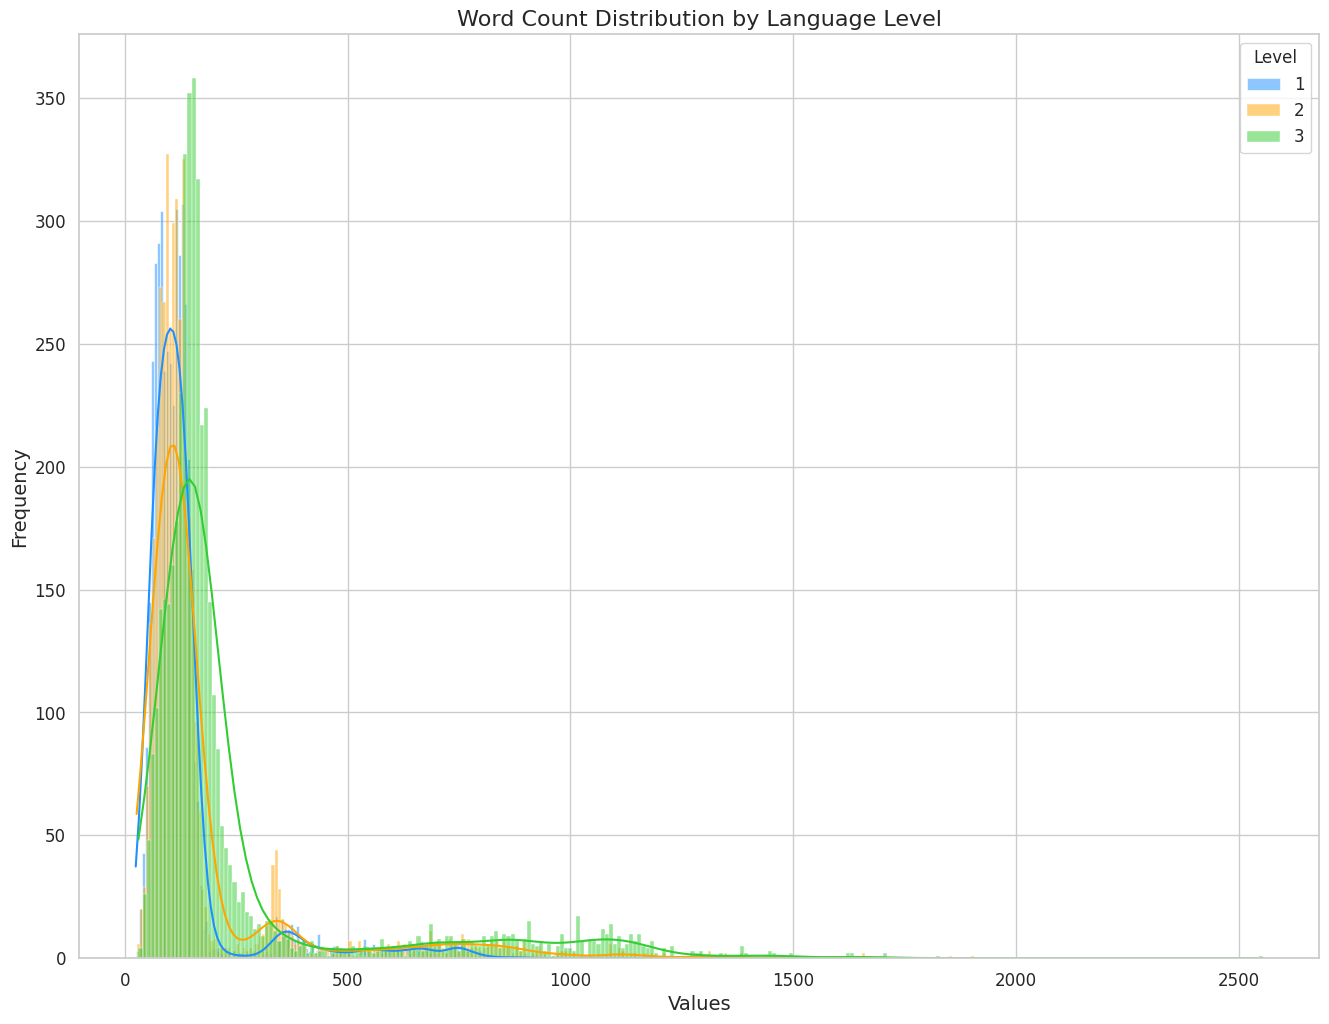

In [164]:
sns.set(style="whitegrid", context="notebook")

# Create the distplot for each level
fig, ax = plt.subplots(figsize=(16, 12))

color_map = {1: "dodgerblue", 2: "orange", 3: "limegreen"}

for level in [1,2,3]:
    sns.histplot(data=df[df["label"] == level], 
                 x="word_count", 
                 kde=True, 
                 label=level, 
                 ax=ax, 
                 alpha=.5, 
                 color=color_map[level] )

# Customize the plot
ax.set_title("Word Count Distribution by Language Level", fontsize=16)
ax.set_xlabel("Values", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.legend(title="Level", fontsize=12)
ax.tick_params(axis="both", which="major", labelsize=12)

# Show the plot
plt.show()

#### Word Cloud by Language Level

Language Level 1


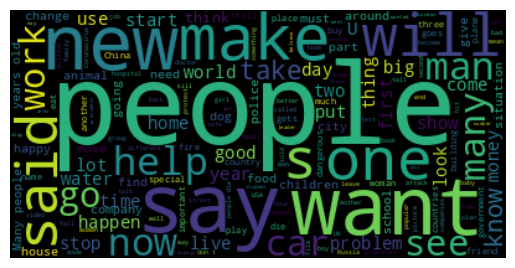

--------------------
Language Level 2


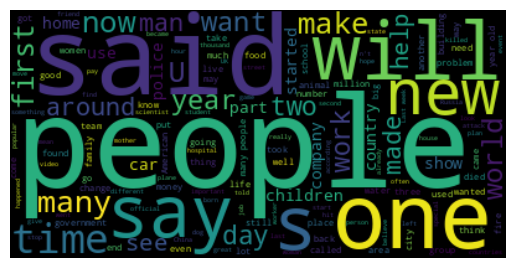

--------------------
Language Level 3


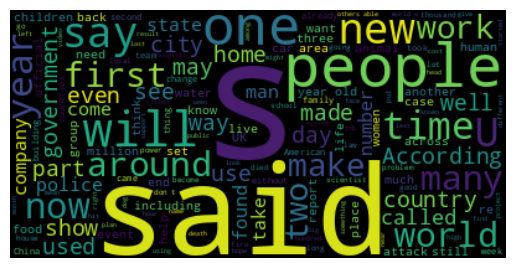

--------------------


In [167]:
from wordcloud import WordCloud

# Create a WordCloud for each level
for label in range(1, 4):
    print("Language Level {}".format(label))
    text = ' '.join(df[df['label'] == label]['text'])
    wordcloud = WordCloud().generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print("-"*20)

### Preprocessing

In [168]:
df_backup = df.copy()

In [169]:
df = df_backup.copy()

In [170]:
df["text"]

0      Hi!\nI've been meaning to write for ages and f...
1      ﻿It was not so much how hard people found the ...
2      Keith recently came back from a trip to Chicag...
3      The Griffith Observatory is a planetarium, and...
4      -LRB- The Hollywood Reporter -RRB- It's offici...
                             ...                        
562    ﻿In typical bad-boyfriend style, Dan Sullivan ...
563    ﻿Thousands of people protested on Australia’s ...
564    ﻿1 Race engineer  A race engineer liaises betw...
565    ﻿More than one million British workers might b...
566    ﻿Low-income countries will remain on the front...
Name: text, Length: 13158, dtype: object

In [171]:
import contractions
import re

def expand_contractions(text):
    """
    Expands contractions in the input text using the contractions library
    and regular expressions.
    I've -> I have
    He's -> He is
    
    Args:
        text (str): The input text with contractions.
    
    Returns:
        str: The input text with contractions expanded.
    """
    # Use the contractions library to expand the contraction
    text_expanded = contractions.fix(text)

    # Use a regular expression to expand the contraction
    text_expanded_re = re.sub(r'\b(\w+)\'(\w+)\b', r"\1'\2", text_expanded)
    
    # Return the expanded text
    return text_expanded_re

df["modified_text"] = df["text"].parallel_apply(lambda t: expand_contractions(t))

In [172]:
df["modified_text"] 

0      Hi!\nI have been meaning to write for ages and...
1      ﻿It was not so much how hard people found the ...
2      Keith recently came back from a trip to Chicag...
3      The Griffith Observatory is a planetarium, and...
4      -LRB- The Hollywood Reporter -RRB- It is offic...
                             ...                        
562    ﻿In typical bad-boyfriend style, Dan Sullivan ...
563    ﻿Thousands of people protested on Australia’s ...
564    ﻿1 Race engineer  A race engineer liaises betw...
565    ﻿More than one million British workers might b...
566    ﻿Low-income countries will remain on the front...
Name: modified_text, Length: 13158, dtype: object

In [173]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import string
import re

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

def preprocess_text(text):
    """
    Note: low-income -> low income
    """
    # Convert text to lowercase
    text = text.lower()
    
    # Replace special characters with whitespace
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # Remove leading and trailing whitespace
    text = text.strip()
    
    # Tokenize text into individual words
    words = nltk.word_tokenize(text)
    
    # Remove stopwords from the text
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize the words using WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Perform snowball stemming on the words
    stemmer = SnowballStemmer("english")
    words = [stemmer.stem(word) for word in words]
    
    # Join the preprocessed words back into a single string
    preprocessed_text = ' '.join(words)
    
    # Remove leading and trailing whitespace
    preprocessed_text = preprocessed_text.strip()
    
    
    return preprocessed_text

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [174]:
df["modified_text"] = df["modified_text"].parallel_apply(lambda t: preprocess_text(t))

In [175]:
df.modified_text

0      hi mean write age final today actual someth tr...
1      much hard peopl found challeng far would go av...
2      keith recent came back trip chicago illinoi mi...
3      griffith observatori planetarium exhibit hall ...
4      lrb hollywood report rrb offici amc walk dead ...
                             ...                        
562    typic bad boyfriend style dan sullivan late br...
563    thousand peopl protest australia beach shark c...
564    1 race engin race engin liais driver mechan ty...
565    one million british worker might employ zero h...
566    low incom countri remain front line human indu...
Name: modified_text, Length: 13158, dtype: object

#### Most Frequent Words after Preprocessing

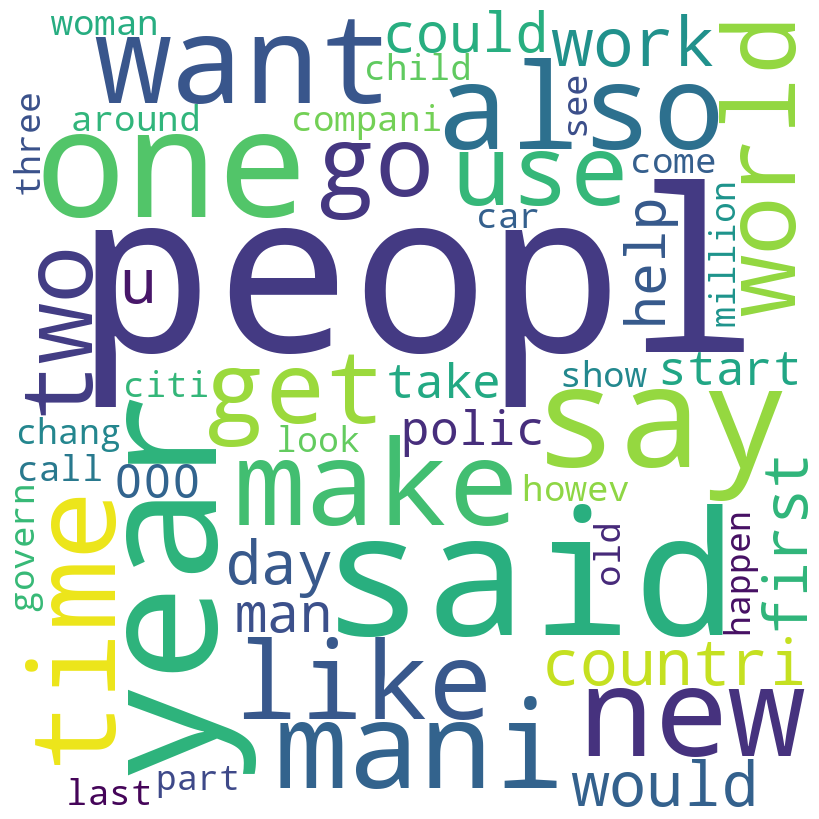

In [176]:
from collections import Counter

# Tokenize the preprocessed text into individual words
words = " ".join(df["modified_text"])
words = nltk.word_tokenize(words)

# Count the frequency of each word
word_freq = Counter(words)

# Create a WordCloud visualization of the most frequent words
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50).generate_from_frequencies(word_freq)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

### CountVectorizer

In [177]:
df.head()

,text,source,label,sentence_count,word_count,modified_text
0,Hi!\nI've been meaning to write for ages and f...,cefr_kaggle,2,26,525,hi mean write age final today actual someth tr...
1,﻿It was not so much how hard people found the ...,cefr_kaggle,2,34,754,much hard peopl found challeng far would go av...
2,Keith recently came back from a trip to Chicag...,cefr_kaggle,2,14,267,keith recent came back trip chicago illinoi mi...
3,"The Griffith Observatory is a planetarium, and...",cefr_kaggle,2,16,335,griffith observatori planetarium exhibit hall ...
4,-LRB- The Hollywood Reporter -RRB- It's offici...,cefr_kaggle,2,18,389,lrb hollywood report rrb offici amc walk dead ...


In [202]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = df["modified_text"]
y = df['label']

In [243]:
# Vectorize the text using CountVectorizer with n-grams in the range (1, 2)
vectorizer = CountVectorizer(stop_words="english")

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Print the number of features created
print(f"Number of features created: {len(vectorizer.get_feature_names())}")

Number of features created: 24322


### LogisticRegression

In [244]:
# Train a Logistic Regression model for multi-class classification
model = LogisticRegression(multi_class='multinomial', 
                           solver='lbfgs', 
                           max_iter=20,
                           penalty = "l2",
                           random_state=42, 
                           n_jobs=num_processors-1)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=20, multi_class='multinomial', n_jobs=3,
                   random_state=42)

In [245]:
y_pred_train = model.predict(X_train_vec)

# Print the classification report
print("Classification report for Train Set")
print(classification_report(y_train, y_pred_train))

Classification report for Train Set
              precision    recall  f1-score   support

           1       0.88      0.94      0.91      3559
           2       0.86      0.81      0.84      3502
           3       0.92      0.90      0.91      3465

    accuracy                           0.89     10526
   macro avg       0.89      0.89      0.89     10526
weighted avg       0.89      0.89      0.89     10526



In [246]:
# Predict the labels on the test set
y_pred = model.predict(X_test_vec)

# Print the classification report
print("Classification report for Test Set")
print(classification_report(y_test, y_pred))

Classification report for Test Set
              precision    recall  f1-score   support

           1       0.78      0.78      0.78       890
           2       0.56      0.55      0.56       876
           3       0.72      0.72      0.72       866

    accuracy                           0.69      2632
   macro avg       0.69      0.69      0.69      2632
weighted avg       0.69      0.69      0.69      2632



In [247]:
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[697 166  27]
 [176 484 216]
 [ 22 217 627]]


In [248]:
# Determine the most and least predictive words for each class
n_top = 10  # Number of top features to display
for i, label in enumerate(model.classes_):
    top_features = sorted(zip(model.coef_[i], vectorizer.get_feature_names()), reverse=True)[:n_top]
    bottom_features = sorted(zip(model.coef_[i], vectorizer.get_feature_names()))[:n_top]
    
    print(f"\nClass {label}:")
    print(f"Top {n_top} Positive Coefficient words: {[feature[1] for feature in top_features]}")
    print(f"Top {n_top} Negative Coefficient words: {[feature[1] for feature in bottom_features]}")


Class 1:
Top 10 Positive Coefficient words: ['dy', 'news', 'yes', 'mom', 'special', 'fall', 'bad', 'okay', 'big', 'tell']
Top 10 Negative Coefficient words: ['came', 'accord', 'becam', 'took', 'sinc', 'current', 'left', 'design', 'known', 'incid']

Class 2:
Top 10 Positive Coefficient words: ['intermedi', 'becam', 'cnn', 'rrb', 'lrb', 'saw', 'came', 'impact', 'took', 'recent']
Top 10 Negative Coefficient words: ['dy', 'yes', 'footag', 'win', 'spot', 'mom', 'news', 'mark', 'dad', 'talk']

Class 3:
Top 10 Positive Coefficient words: ['footag', 'accord', 'attempt', 'forc', 'resid', 'rescu', 'seen', 'despit', 'launch', 'claim']
Top 10 Negative Coefficient words: ['intermedi', 'special', 'danger', 'news', 'big', 'problem', 'bad', 'rrb', '2012', 'lrb']


**News Articles are dominating the predictions**

#### Combined Feature Importance

In [249]:
clf = model

feature_names = vectorizer.get_feature_names_out()
coefs_with_fns = zip(feature_names, clf.coef_[0])

coefs_with_fns_df = pd.DataFrame(coefs_with_fns,
                    columns=['feature', 'coefficient'])

In [250]:
coefs_with_fns_df.sort_values(by='coefficient', ascending=True, inplace=True)
coefs_with_fns_df.head(10)

,feature,coefficient
4369,came,-1.260183
1494,accord,-1.177401
3181,becam,-1.104322
21978,took,-1.097072
19940,sinc,-1.045182
6129,current,-1.006480
12859,left,-0.993546
6634,design,-0.952142
12434,known,-0.887328
11176,incid,-0.872765


##### Prediction Powers

In [251]:
y_pred_prob = model.predict_proba(X_test_vec)
y_pred_class = model.predict(X_test_vec)

In [252]:
X_test_df = pd.DataFrame(X_test)
X_test_df.reset_index(inplace=True, drop=True)

y_test_df = pd.DataFrame(y_test)
y_test_df.reset_index(inplace=True, drop=True)

In [253]:
y_pred_prob_df = pd.DataFrame(y_pred_prob)
y_pred_prob_df.columns = ['1-prob', '2-prob', '3-prob']

y_pred_class_df = pd.DataFrame(y_pred_class)
y_pred_class_df.columns = ['predicted']

In [254]:
results_df = pd.DataFrame(X_test).join(y_test_df).join(y_pred_class_df).join(y_pred_prob_df)

In [255]:
pd.options.display.max_colwidth = None
results_df.head(20)

,modified_text,label,predicted,1-prob,2-prob,3-prob
1,tourist amsterdam still seem liber recent citi mayor told coffe shop sell marijuana would stay open although new nation law stop drug tourism dutch capit plan send antisoci neighbour scum villag made ship contain mayb peopl think liber citi mayor eberhard van der laan say new plan solv problem antisoci behaviour cost 810 000 plan hope protect victim abus homophobia camp antisoci famili live three six month call scum villag last year geert wilder far right politician said offend go villag scum bartho boer spokesman mayor say plan illiber want defend liber valu amsterdam say want everyon whether gay lesbian tri stop violenc victim harass want defend accord boer villag problem neighbour stereo loud saturday night peopl violent clear situat victim harass peopl found guilti violent harass evict home put temporari home includ ship contain industri area citi call live contain say boer contain shower kitchen use student accommod go use contain want show peopl antisoci get better accommod one dutch newspap wrote 19th centuri antisoci peopl move villag drenth overijssel soon becam slum boer say govern learn past mistak plan put antisoci famili togeth scum hous scum villag say boer want put one famili area maximum six month hous differ part citi famili get perman home citi govern expect move ten famili year start 2013 polic watch temporari accommod antisoci famili also abl see doctor social worker take care whole situat go repeat new hous say boer,2.0,2.0,3.552955e-01,0.603212,0.041492
2,keith recent came back trip chicago illinoi midwestern metropoli found along shore lake michigan visit keith spent lot time explor citi visit import landmark monument keith love basebal made sure take visit wrigley field take tour spectacular stadium also got watch chicago cub game stadium keith fan cheer cub keith happi cub score 5 4 chicago mani histor place visit keith found chicago water tower impress one remain landmark surviv great chicago fire 1871 keith also took walk jackson park great outdoor space host world fair 1892 park great leisur stroll still featur origin architectur replica monument featur world fair last part visit keith manag climb stair insid willi tower 110 stori skyscrap despit challeng climb mani flight stair keith felt reach top worth effort rooftop keith receiv gorgeous view citi skylin lake michigan background,1.0,1.0,9.838473e-01,0.010041,0.006112
4,auction banksi paint disappear wall north london shop stop moment go sold slave labour spray paint artwork show child make flag expect price 700 000 go sale street art florida freder thut owner fine art auction miami art hous said slave labour second work secret british street artist remov sale auction want give name seller peopl haringey london happi led campaign stop sale artwork remov wall poundland shop haringey write auction hous find happen next realli pleas peopl campaign london impact u real victori peopl said alan strickland haringey councillor auction hous said told owner two banksi remov sale legal problem sale artwork banksi faam told seller remov auction critic said auction hous buy sell stolen properti thut said seller real owner sale legal ad galleri receiv mani email phone call uk said thought right sell two piec artwork would keep safe second banksi go auction 2007 artwork call wet dog remov bethlehem wall estim price 800 000 poundland said idea remov 4ft x 5ft mural side shop banksi comment sale slave labour condemn peopl tri sell artwork past stephan keszler dealer 2011 auction new york also plan sell banki paint belief sell banksi work without permiss fair someth peopl wall hous without ask owner properti whatev want keszler said,3.0,3.0,1.358879e-02,0.027866,0.958546
4,hello student websit name www speakinlevel com use filter search peopl level speak via skype also search peopl countri gender men woman also use form write peopl inform peopl readi talk afraid talk somebodi know worri tip topic help start tal

### NaiveBayesClassifier

In [390]:
from sklearn.naive_bayes import MultinomialNB

# Train a Multinomial Naive Bayes model for multi-class classification
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [391]:
y_pred_train = model.predict(X_train_vec)

# Print the classification report
print("Classification report for Train Set")
print(classification_report(y_train, y_pred_train))

Classification report for Train Set
              precision    recall  f1-score   support

           1       0.74      0.95      0.83      3541
           2       0.69      0.63      0.66      3521
           3       0.89      0.72      0.80      3464

    accuracy                           0.76     10526
   macro avg       0.77      0.76      0.76     10526
weighted avg       0.77      0.76      0.76     10526



In [392]:
# Predict the labels on the test set
y_pred = model.predict(X_test_vec)

# Print the classification report
print("Classification report for Test Set")
print(classification_report(y_test, y_pred))

Classification report for Test Set
              precision    recall  f1-score   support

           1       0.63      0.80      0.71       908
           2       0.38      0.38      0.38       857
           3       0.73      0.54      0.62       867

    accuracy                           0.58      2632
   macro avg       0.58      0.57      0.57      2632
weighted avg       0.59      0.58      0.57      2632



In [380]:
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[694 187  27]
 [160 484 213]
 [ 33 182 652]]


### BERTClassifier

KTrain classification models: 

name (string): one of:
- 'fasttext' for FastText model
- 'nbsvm' for NBSVM model
- 'logreg' for logistic regression using embedding layers
- 'bigru' for Bidirectional GRU with pretrained word vectors
- 'bert' for BERT Text Classification
- 'distilbert' for Hugging Face DistilBert model

In [54]:
df

,text,source,label,modified_text
0,Hi!\nI've been meaning to write for ages and f...,cefr_kaggle,2,hi mean write age final today actual someth tr...
1,﻿It was not so much how hard people found the ...,cefr_kaggle,2,much hard peopl found challeng far would go av...
2,Keith recently came back from a trip to Chicag...,cefr_kaggle,2,keith recent came back trip chicago illinoi mi...
3,"The Griffith Observatory is a planetarium, and...",cefr_kaggle,2,griffith observatori planetarium exhibit hall ...
4,-LRB- The Hollywood Reporter -RRB- It's offici...,cefr_kaggle,2,lrb hollywood report rrb offici amc walk dead ...
...,...,...,...,...
562,"﻿In typical bad-boyfriend style, Dan Sullivan ...",onestop_english_corpus,3,typic bad boyfriend style dan sullivan late br...
563,﻿Thousands of people protested on Australia’s ...,onestop_english_corpus,3,thousand peopl protest australia beach shark c...
564,﻿1 Race engineer A race engineer liaises betw...,onestop_english_corpus,3,1 race engin race engin liais driver mechan ty...
565,﻿More than one million British workers might b...,onestop_english_corpus,3,one million british worker might employ zero h...


In [3]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [55]:
import ktrain
from ktrain import text

In [56]:
df = df[["modified_text", "label"]]

In [57]:
df["label"] = df["label"] - 1  # change the label to 0, 1, 2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)

In [69]:
print("Shape of train_df", train_df.shape)
print("Shape of test_df", test_df.shape)

Shape of train_df (11842, 2)
Shape of test_df (1316, 2)


In [70]:
# import ktrain
from ktrain import text

# Split the data
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(train_df=train_df,
                                                                   text_column='modified_text',
                                                                   label_columns=['label'],
                                                                   val_pct=0.1,
                                                                   maxlen=350,
                                                                   max_features=35000,
                                                                   preprocess_mode='bert')

['label_0', 'label_1', 'label_2']
      label_0  label_1  label_2
8649      0.0      1.0      0.0
5602      0.0      0.0      1.0
1298      0.0      1.0      0.0
1176      1.0      0.0      0.0
3883      1.0      0.0      0.0
['label_0', 'label_1', 'label_2']
      label_0  label_1  label_2
5187      0.0      1.0      0.0
3004      1.0      0.0      0.0
7268      1.0      0.0      0.0
4822      1.0      0.0      0.0
9374      0.0      0.0      1.0
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [72]:
# Create the model
model = text.text_classifier(name='bert',
                             train_data=(x_train, y_train),
                             preproc=preproc)

# Train the model
learner = ktrain.get_learner(model=model,
                             train_data=(x_train, y_train),
                             val_data=(x_test, y_test),
                             batch_size=6)

learner.fit_onecycle(lr=2e-5, epochs=1, verbose=1)

# Save the model
predictor = ktrain.get_predictor(learner.model, preproc)

Is Multi-Label? False
maxlen is 350
done.


begin training using onecycle policy with max lr of 2e-05...
1777/1777 [==============================] - 1016s 562ms/step - loss: 0.5940 - accuracy: 0.7365 - val_loss: 0.3750 - val_accuracy: 0.8447


### Areas of Improvement
* Stratified sampling

In [ ]:
# Evaluation
y_pred = predictor.predict(list(test_df["modified_text"]))

42/42 [==============================] - 38s 914ms/step


In [268]:
y_true = list(test_df["label"])

In [269]:
y_pred_train = predictor.predict(list(train_df["modified_text"]))
y_true_train = list(train_df["label"])

371/371 [==============================] - 346s 932ms/step


In [273]:
y_pred = [int(_p.split("_")[1]) for _p in y_pred]
y_pred_train =  [int(_p.split("_")[1]) for _p in y_pred_train]

TRAIN SET: Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3985
           1       0.81      0.82      0.82      3958
           2       0.91      0.84      0.87      3899

    accuracy                           0.87     11842
   macro avg       0.87      0.87      0.87     11842
weighted avg       0.87      0.87      0.87     11842



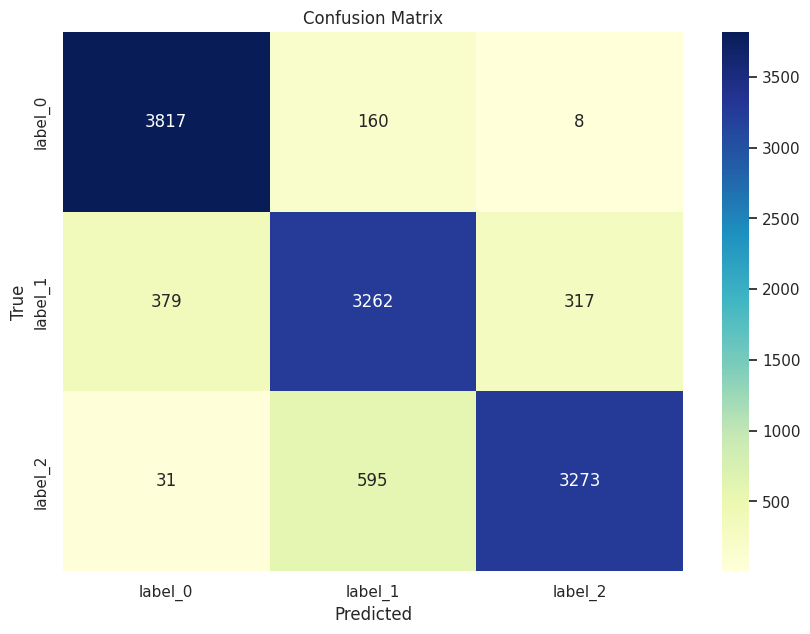

In [279]:
# Classification report
print("TRAIN SET: Classification Report:")
print(classification_report(y_true_train, y_pred_train))

# Confusion Matrix
cm = confusion_matrix(y_true_train, y_pred_train)

# Confusion Matrix Visualization
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=preproc.get_classes(),
            yticklabels=preproc.get_classes())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')

TEST SET: Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       464
           1       0.72      0.74      0.73       420
           2       0.87      0.79      0.83       432

    accuracy                           0.82      1316
   macro avg       0.82      0.82      0.82      1316
weighted avg       0.82      0.82      0.82      1316



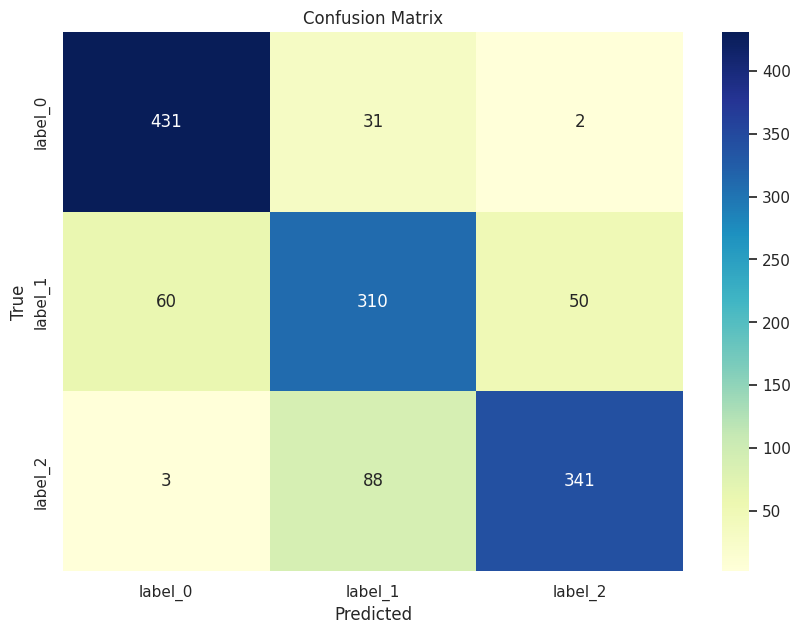

In [278]:
# Classification report
print("TEST SET: Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix Visualization
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=preproc.get_classes(),
            yticklabels=preproc.get_classes())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')